artists sourced from https://www.sfoutsidelands.com/lineup/#/lineup_groupings/daily-lineup

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import requests

import matplotlib.pyplot as plt

## Read in the Data

In [2]:
artists = pd.read_csv('artists.csv')

In [3]:
artists

,artist_name,day,daily_rank,solo_group,gender,wiki_link
0,SZA,Friday,1,solo,female,https://en.wikipedia.org/wiki/SZA
1,Phoebe Bridgers,Friday,2,solo,female,https://en.wikipedia.org/wiki/Phoebe_Bridgers
2,Lil Uzi Vert,Friday,3,solo,male,https://en.wikipedia.org/wiki/Lil_Uzi_Vert
3,Disclosure,Friday,4,group,male,https://en.wikipedia.org/wiki/Disclosure_(band)
4,Oliver Tree,Friday,5,solo,male,https://en.wikipedia.org/wiki/Oliver_Tree
...,...,...,...,...,...,...
87,Unusual Demont,Sunday,27,solo,male,NaN
88,Forester,Sunday,28,group,male,NaN
89,Tre' Amani,Sunday,29,solo,male,NaN
90,ABSOLUTE.,Sunday,30,solo,male,NaN


Wiki links were available for 69 out of the 92 total artists. 75%

## Scrape the 'Background Information' Table from Artists' Wikipedia Page

### Creating a series of all the wikipedia links

In [4]:
artists_with_link = artists[~artists['wiki_link'].isnull()]
artists_with_link

,artist_name,day,daily_rank,solo_group,gender,wiki_link
0,SZA,Friday,1,solo,female,https://en.wikipedia.org/wiki/SZA
1,Phoebe Bridgers,Friday,2,solo,female,https://en.wikipedia.org/wiki/Phoebe_Bridgers
2,Lil Uzi Vert,Friday,3,solo,male,https://en.wikipedia.org/wiki/Lil_Uzi_Vert
3,Disclosure,Friday,4,group,male,https://en.wikipedia.org/wiki/Disclosure_(band)
4,Oliver Tree,Friday,5,solo,male,https://en.wikipedia.org/wiki/Oliver_Tree
...,...,...,...,...,...,...
64,Briston Maroney,Sunday,19,solo,male,https://en.wikipedia.org/wiki/Briston_Maroney
65,Tyla Yaweh,Sunday,21,solo,male,https://en.wikipedia.org/wiki/Tyla_Yaweh
66,Glaive,Sunday,22,solo,male,https://en.wikipedia.org/wiki/Glaive_(musician)
67,DJ Minx,Sunday,24,solo,female,https://en.wikipedia.org/wiki/DJ_Minx


In [5]:
#creating a series of all the wiki links to use as the input for the formula below
artist_series = pd.Series(artists_with_link['wiki_link'])
artist_series.head()

0                  https://en.wikipedia.org/wiki/SZA
1      https://en.wikipedia.org/wiki/Phoebe_Bridgers
2         https://en.wikipedia.org/wiki/Lil_Uzi_Vert
3    https://en.wikipedia.org/wiki/Disclosure_(band)
4          https://en.wikipedia.org/wiki/Oliver_Tree
Name: wiki_link, dtype: object

### Defining a function that will iteratively scrape the wiki tables and concatenate them 

In [6]:
def get_artist_wiki(series):
    
    #creating a blank table with the desired column names
    table = pd.DataFrame(columns =["Feature", "Value", "Artist"])
        
    for i in range(len(series)):
        #requesting the content from the wiki link
        html_doc = requests.get(series.iloc[i]).content
        
        #pulling all the tables from the html
        tables = pd.read_html(html_doc)
        
        #selecting the first table, "Background Information"
        fixed = tables[0]
        
        #filling the artist column with the artist's name
        fixed["Artist_name"] = fixed.columns[0]
        
        #resetting the column names to to the desired column names
        fixed.columns = table.columns
        
        #concatenate the blank table with each new additional table
        table = pd.concat([table, fixed], ignore_index = True)
    return table

In [7]:
scraped_wiki_data = get_artist_wiki(artist_series)

In [8]:
scraped_wiki_data

,Feature,Value,Artist
0,SZA in 2017,SZA in 2017,SZA
1,Background information,Background information,SZA
2,Birth name,Solána Imani Rowe,SZA
3,Born,"(age 32)St. Louis, Missouri, U.S.",SZA
4,Origin,"Maplewood, New Jersey, U.S.",SZA
...,...,...,...
599,Occupation(s),Singer-songwritermusician,Cassandra Jenkins
600,Instruments,Vocalsguitar,Cassandra Jenkins
601,Years active,2013–present,Cassandra Jenkins
602,Labels,Ba Da Bing RecordsMelodic Records,Cassandra Jenkins


## Extracting Age Information

In [9]:
born = scraped_wiki_data[scraped_wiki_data['Feature'] == 'Born'].drop(columns = "Feature", axis =1)

born.rename(columns = {'Value':'Born', 'Artist':'artist_name'}, inplace = True)

born.head(20)

,Born,artist_name
3,"(age 32)St. Louis, Missouri, U.S.",SZA
14,"(age 27)Pasadena, California, U.S.",Phoebe Bridgers
25,"(age 26)Francisville, Philadelphia, Pennsylvan...",Lil Uzi Vert
42,"Oliver Tree Nickell (age 28)Santa Cruz, Califo...",Oliver Tree
67,Sloan Christian Struble[1] (age 22)[2][3]Fort ...,Sloan Struble
81,"1980 (age 41–42)Dresden, East Germany",Purple Disco Machine
98,"(age 39)Perry, Georgia, U.S.",Washed Out
107,"(age 29)San Jose, California",Ashe
116,"(age 25)[1]Portland, Maine, U.S.",Role Model
135,"(age 38)Washington, D.C., U.S.",Rostam Batmanglij


In [10]:
born_series = pd.Series(born['Born']).apply(lambda st: st[st.find("(")+1:st.find(")")])
born_series.head()

3     age 32
14    age 27
25    age 26
42    age 28
67    age 22
Name: Born, dtype: object

In [11]:
born['Age'] = born_series

In [12]:
born['Age'] = born['Age'].str.extract('(\d+)', expand=False)

In [13]:
born.count()
#We now have the ages of 40 artists

Born           44
artist_name    44
Age            40
dtype: int64

In [14]:
born.drop(columns = "Born", axis = 1, inplace = True)

In [15]:
artists_1 = pd.merge(artists, born, on='artist_name', how='left')

In [16]:
artists_1

,artist_name,day,daily_rank,solo_group,gender,wiki_link,Age
0,SZA,Friday,1,solo,female,https://en.wikipedia.org/wiki/SZA,32
1,Phoebe Bridgers,Friday,2,solo,female,https://en.wikipedia.org/wiki/Phoebe_Bridgers,27
2,Lil Uzi Vert,Friday,3,solo,male,https://en.wikipedia.org/wiki/Lil_Uzi_Vert,26
3,Disclosure,Friday,4,group,male,https://en.wikipedia.org/wiki/Disclosure_(band),NaN
4,Oliver Tree,Friday,5,solo,male,https://en.wikipedia.org/wiki/Oliver_Tree,28
...,...,...,...,...,...,...,...
87,Unusual Demont,Sunday,27,solo,male,NaN,NaN
88,Forester,Sunday,28,group,male,NaN,NaN
89,Tre' Amani,Sunday,29,solo,male,NaN,NaN
90,ABSOLUTE.,Sunday,30,solo,male,NaN,NaN


In [17]:
artists_1.count()

artist_name    92
day            92
daily_rank     92
solo_group     92
gender         92
wiki_link      69
Age            40
dtype: int64

## Extracting Starting Year from Years Active

In [18]:
start_year = scraped_wiki_data[scraped_wiki_data['Feature'] == 'Years active'].drop(columns = "Feature", axis =1)

start_year.rename(columns = {'Value':'Start_year', 'Artist':'artist_name'}, inplace = True)

print(start_year.shape)
start_year.head()

(49, 2)


,Start_year,artist_name
7,2011–present,SZA
18,2012–present,Phoebe Bridgers
29,2012–present,Lil Uzi Vert
36,2010–present,Disclosure
60,2016–present,The Marías


In [19]:
start_year_series = pd.Series(start_year['Start_year']).str.extract('(\d+)', expand=False)
start_year_series.head()

7     2011
18    2012
29    2012
36    2010
60    2016
Name: Start_year, dtype: object

In [20]:
start_year['Start_year'] = start_year_series

In [21]:
start_year.head()

,Start_year,artist_name
7,2011,SZA
18,2012,Phoebe Bridgers
29,2012,Lil Uzi Vert
36,2010,Disclosure
60,2016,The Marías


In [22]:
artists_2 = pd.merge(artists_1, start_year, on='artist_name', how='left')

In [23]:
artists_2

,artist_name,day,daily_rank,solo_group,gender,wiki_link,Age,Start_year
0,SZA,Friday,1,solo,female,https://en.wikipedia.org/wiki/SZA,32,2011
1,Phoebe Bridgers,Friday,2,solo,female,https://en.wikipedia.org/wiki/Phoebe_Bridgers,27,2012
2,Lil Uzi Vert,Friday,3,solo,male,https://en.wikipedia.org/wiki/Lil_Uzi_Vert,26,2012
3,Disclosure,Friday,4,group,male,https://en.wikipedia.org/wiki/Disclosure_(band),NaN,2010
4,Oliver Tree,Friday,5,solo,male,https://en.wikipedia.org/wiki/Oliver_Tree,28,NaN
...,...,...,...,...,...,...,...,...
87,Unusual Demont,Sunday,27,solo,male,NaN,NaN,NaN
88,Forester,Sunday,28,group,male,NaN,NaN,NaN
89,Tre' Amani,Sunday,29,solo,male,NaN,NaN,NaN
90,ABSOLUTE.,Sunday,30,solo,male,NaN,NaN,NaN


## Extracting Genres

In [24]:
genre = scraped_wiki_data[scraped_wiki_data['Feature'] == 'Genres'].drop(columns = "Feature", axis =1)

genre.rename(columns = {'Value':'Genre', 'Artist':'artist_name'}, inplace = True)

print(genre.shape)
genre.head()

(61, 2)


,Genre,artist_name
5,R&B[1],SZA
15,Indie rockindie folkemo-folkindie pop,Phoebe Bridgers
27,Hip hoptrapemo rapSoundCloud rappop rap,Lil Uzi Vert
35,House deep house UK garage synth-pop future ga...,Disclosure
50,Indie pop hip hop dance[2],Oliver Tree


In [25]:
genre_series = pd.Series(genre['Genre']).str.replace('[\d+]', '')
genre_series

/var/folders/98/mxbw17yj0qvcz_y3hldkfjb00000gn/T/ipykernel_38194/3144981400.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  genre_series = pd.Series(genre['Genre']).str.replace('[\d+]', '')


5                                                  R&B[]
15                 Indie rockindie folkemo-folkindie pop
27               Hip hoptrapemo rapSoundCloud rappop rap
35     House deep house UK garage synth-pop future ga...
50                             Indie pop hip hop dance[]
                             ...                        
564                                           folk, rock
573                                         Hip hoppop[]
582                                Hyperpop digicore pop
590                        Detroit techno, house, techno
598                              Ambient pop[]folk-pop[]
Name: Genre, Length: 61, dtype: object

In [26]:
genre['Genre'] = genre_series

In [27]:
genre.head()

,Genre,artist_name
5,R&B[],SZA
15,Indie rockindie folkemo-folkindie pop,Phoebe Bridgers
27,Hip hoptrapemo rapSoundCloud rappop rap,Lil Uzi Vert
35,House deep house UK garage synth-pop future ga...,Disclosure
50,Indie pop hip hop dance[],Oliver Tree


In [28]:
artists_3 = pd.merge(artists_2, genre, on='artist_name', how='left')

In [29]:
artists_3

,artist_name,day,daily_rank,solo_group,gender,wiki_link,Age,Start_year,Genre
0,SZA,Friday,1,solo,female,https://en.wikipedia.org/wiki/SZA,32,2011,R&B[]
1,Phoebe Bridgers,Friday,2,solo,female,https://en.wikipedia.org/wiki/Phoebe_Bridgers,27,2012,Indie rockindie folkemo-folkindie pop
2,Lil Uzi Vert,Friday,3,solo,male,https://en.wikipedia.org/wiki/Lil_Uzi_Vert,26,2012,Hip hoptrapemo rapSoundCloud rappop rap
3,Disclosure,Friday,4,group,male,https://en.wikipedia.org/wiki/Disclosure_(band),NaN,2010,House deep house UK garage synth-pop future ga...
4,Oliver Tree,Friday,5,solo,male,https://en.wikipedia.org/wiki/Oliver_Tree,28,NaN,Indie pop hip hop dance[]
...,...,...,...,...,...,...,...,...,...
87,Unusual Demont,Sunday,27,solo,male,NaN,NaN,NaN,NaN
88,Forester,Sunday,28,group,male,NaN,NaN,NaN,NaN
89,Tre' Amani,Sunday,29,solo,male,NaN,NaN,NaN,NaN
90,ABSOLUTE.,Sunday,30,solo,male,NaN,NaN,NaN,NaN


## Fixing Data Types

In [30]:
artists_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  92 non-null     object
 1   day          92 non-null     object
 2   daily_rank   92 non-null     int64 
 3   solo_group   92 non-null     object
 4   gender       92 non-null     object
 5   wiki_link    69 non-null     object
 6   Age          40 non-null     object
 7   Start_year   49 non-null     object
 8   Genre        61 non-null     object
dtypes: int64(1), object(8)
memory usage: 7.2+ KB


In [31]:
artists_3['Age'] = pd.to_numeric(artists_3['Age'], errors='coerce')
artists_3['Start_year'] = pd.to_numeric(artists_3['Start_year'])

In [32]:
artists_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   artist_name  92 non-null     object 
 1   day          92 non-null     object 
 2   daily_rank   92 non-null     int64  
 3   solo_group   92 non-null     object 
 4   gender       92 non-null     object 
 5   wiki_link    69 non-null     object 
 6   Age          40 non-null     float64
 7   Start_year   49 non-null     float64
 8   Genre        61 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.2+ KB


## Data Exploration

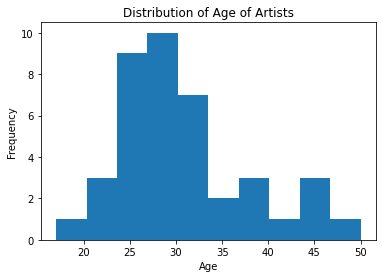

In [33]:
plt.hist(artists_3['Age'], bins= 10)
plt.title('Distribution of Age of Artists')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Exporting to create visualizations

In [34]:
artists_3.to_csv('artists_python_output.csv')
